In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo

In [146]:
def read_data(url):
  df = pd.read_csv(url)
  return df

def plot_data(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['time'], df['today'], label='Today Sales', marker='o')
    plt.plot(df['time'], df['yesterday'], label='Yesterday Sales', marker='s')
    plt.plot(df['time'], df['avg_last_week'], label='Average Sales Last Week', \
             marker='d')
    plt.plot(df['time'], df['avg_last_month'], label='Average Sales Last Month', \
             marker='D')
    plt.xlabel('Hour')
    plt.ylabel('Sales')
    plt.title('Hourly Sales Comparison')
    plt.legend()
    plt.show()

def plot_transactions(df):
  plt.figure(figsize=(12, 6))
  plt.plot(df['time'], df['status'], label='Today Sales', marker='o')
  plt.plot(df['time'], df['yesterday'], label='Yesterday Sales', marker='s')
  plt.plot(df['time'], df['avg_last_week'], label='Average Sales Last Week', marker='d')
  plt.plot(df['time'], df['avg_last_month'], label='Average Sales Last Month', marker='D')
  plt.xlabel('Hour')
  plt.ylabel('Sales')
  plt.title('Hourly Sales Comparison')
  plt.legend()
  plt.show()

def pivot_df(df):
  pivoted = df.pivot_table(index='time', \
                        columns='status', \
                        values='f0_', fill_value=0
                      )
  pivoted['total'] = pivoted.sum(axis=1)
  pivoted['success_rate'] = pivoted['approved']/ \
    (pivoted['backend_reversed'] + pivoted['reversed'] +\
    pivoted['denied'] +\
    pivoted['failed'] + \
    pivoted['approved']
    )
  pivoted['denial_rate'] = pivoted['denied']/ \
    (pivoted['backend_reversed'] + pivoted['reversed'] +\
    pivoted['denied'] +\
    pivoted['failed'] + \
    pivoted['approved']
    )
  pivoted['reversal_rate'] = (pivoted['reversed'] + pivoted['backend_reversed'])/\
                              (pivoted['backend_reversed'] + pivoted['reversed'] +\
                              pivoted['denied'] +\
                              pivoted['failed'] + \
                              pivoted['approved']
                              )
  pivoted['failure_rate'] = pivoted['failed'] /\
                              (pivoted['backend_reversed'] + pivoted['reversed'] +\
                              pivoted['denied'] +\
                              pivoted['failed'] + \
                              pivoted['approved']
                              )
  pivoted = pivoted.reset_index(drop=False)
  pivoted['hour'] = pivoted['time'].str[0:2].astype(int)
  pivoted['minute'] = pivoted['time'].str[-2:].astype(int)
  pivoted = pivoted.drop(columns='time')
  pivoted = pivoted.fillna(0)
  return pivoted

def plot_transactions_status(df_pivot):
   # Assuming 'pivoted' is your pivoted DataFrame with the 'sum_values' column added
  
  df_pivot['time'] = df_pivot['hour'].astype(str).str.zfill(2) + ':' + df_pivot['minute'].astype(str).str.zfill(2)
  df_pivot = df_pivot.drop(columns=['hour', 'minute'])
  columns_to_plot = ['approved', 'backend_reversed', 'reversed', 'denied', \
                    'failed', 'processing', 'refunded','success_rate', 'reversal_rate', \
                    'failure_rate', 'denial_rate', 'time', 'total']

  # Filter the DataFrame to include only the columns you want to plot
  filtered_df = df_pivot[columns_to_plot]
  
  # Create traces for each column
  traces = []
  for column in filtered_df.columns:
    if column != 'time':
      trace = go.Scatter(x=filtered_df['time'], y=filtered_df[column], mode='lines', name=column)
      traces.append(trace)

  # Create layout for the plot
  layout = go.Layout(
      title='Values vs Time',
      xaxis=dict(title='Time'),
      yaxis=dict(title='Values'),
      legend=dict(orientation='h')
  )

  # Create figure and plot
  fig = go.Figure(data=traces, layout=layout)

  # Display the plot
  pyo.iplot(fig)

In [3]:
df_1 = read_data('https://raw.githubusercontent.com/thais-menezes/monitoring/main/checkout_1.csv')
df_1

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,9,12,11,6.42,4.85
1,01h,3,5,1,1.85,1.92
2,02h,1,0,0,0.28,0.82
3,03h,1,0,0,0.42,0.46
4,04h,0,0,1,0.42,0.21
5,05h,1,1,2,1.28,0.75
6,06h,1,1,5,2.85,2.28
7,07h,2,3,9,5.57,5.21
8,08h,0,1,18,8.71,10.42
9,09h,2,9,30,20.00,19.07


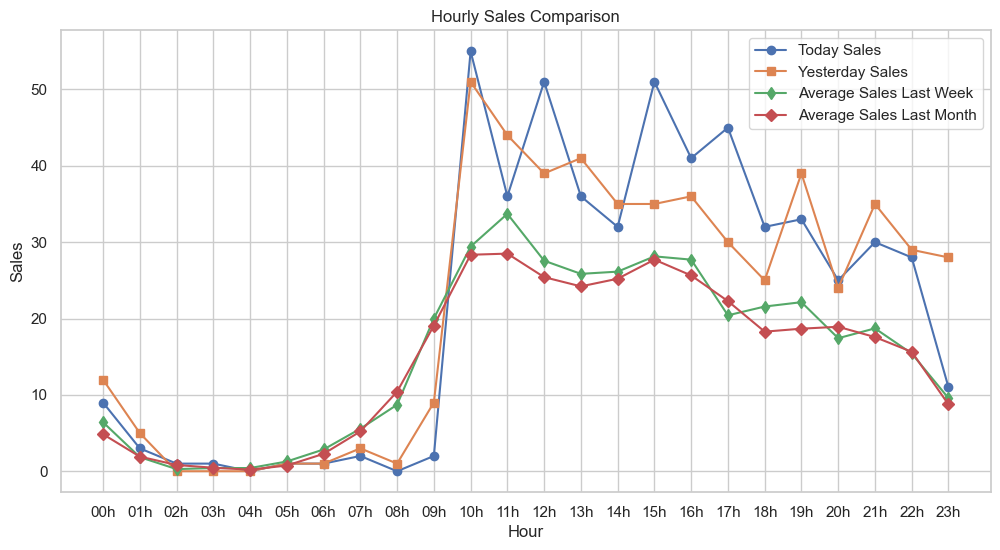

In [74]:
df_1.describe()
plot_data(df_1)

In [75]:
df_2 = read_data('https://raw.githubusercontent.com/thais-menezes/monitoring/main/checkout_2.csv')
df_2

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,6,9,5,5.000,4.92
1,01h,3,3,2,2.000,1.92
2,02h,3,1,2,0.420,0.75
3,03h,0,1,1,0.420,0.46
4,04h,0,0,0,0.140,0.21
5,05h,2,1,1,0.710,0.71
6,06h,3,1,2,1.420,2.10
7,07h,10,2,9,3.000,5.03
8,08h,25,0,12,3.710,9.82
9,09h,36,2,27,10.140,17.64


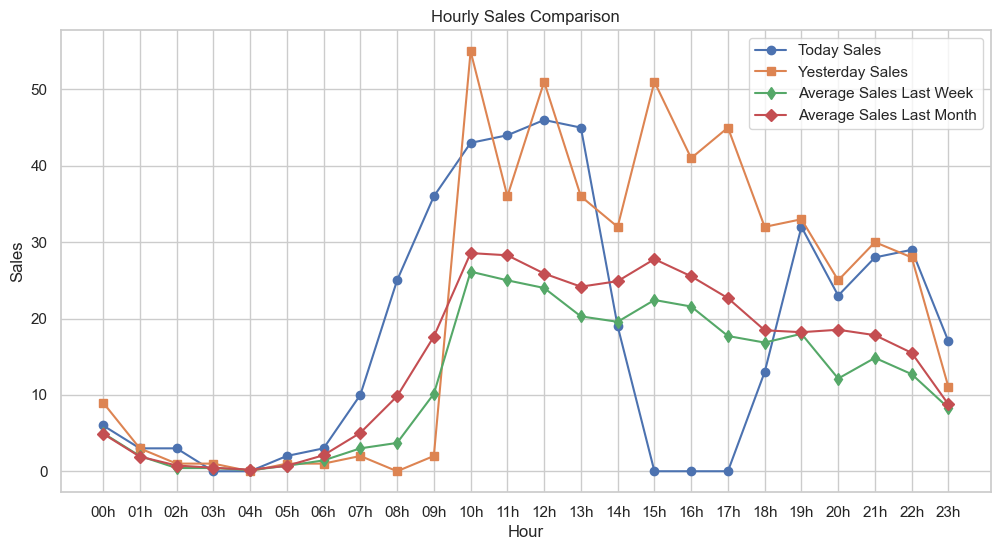

In [76]:
df_2.describe()
plot_data(df_2)

In [101]:
df_3 = read_data('https://raw.githubusercontent.com/thais-menezes/monitoring/main/transactions_1.csv')
df_3

,time,status,f0_
0,00h 00,approved,9
1,00h 00,denied,6
2,00h 00,refunded,1
3,00h 01,denied,8
4,00h 01,approved,13
...,...,...,...
4229,23h 59,processing,4
4230,23h 59,denied,1
4231,23h 59,backend_reversed,5
4232,23h 59,approved,10


In [102]:
df_3_pivot = pivot_df(df_3)
df_3_pivot

status,approved,backend_reversed,denied,failed,processing,refunded,reversed,total,success_rate,denial_rate,reversal_rate,failure_rate,hour,minute
0,9.0,0.0,6.0,0.0,0.0,1.0,0.0,16.0,0.600000,0.400000,0.000000,0.0,0,0
1,13.0,0.0,8.0,0.0,0.0,0.0,0.0,21.0,0.619048,0.380952,0.000000,0.0,0,1
2,11.0,0.0,7.0,0.0,0.0,1.0,0.0,19.0,0.611111,0.388889,0.000000,0.0,0,2
3,12.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,0.800000,0.200000,0.000000,0.0,0,3
4,11.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.000000,0.000000,0.000000,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,32.0,0.0,4.0,0.0,0.0,0.0,0.0,36.0,0.888889,0.111111,0.000000,0.0,23,55
1318,30.0,0.0,3.0,0.0,0.0,0.0,0.0,33.0,0.909091,0.090909,0.000000,0.0,23,56
1319,21.0,0.0,4.0,0.0,0.0,0.0,1.0,26.0,0.807692,0.153846,0.038462,0.0,23,57
1320,11.0,4.0,3.0,0.0,3.0,1.0,2.0,24.0,0.550000,0.150000,0.300000,0.0,23,58


In [147]:
plot_transactions_status(df_3_pivot)

In [120]:
df_4 = read_data('https://raw.githubusercontent.com/thais-menezes/monitoring/main/transactions_2.csv')
df_4 = df_4.rename(columns={'count': 'f0_'})
df_4

,time,status,f0_
0,00h 00,reversed,7
1,00h 00,approved,9
2,00h 00,processing,12
3,00h 00,denied,3
4,00h 00,backend_reversed,2
...,...,...,...
3939,23h 57,denied,11
3940,23h 58,denied,4
3941,23h 58,approved,35
3942,23h 59,denied,10


In [121]:
df_4_pivot = pivot_df(df_4)
df_4_pivot

status,approved,backend_reversed,denied,failed,processing,refunded,reversed,total,success_rate,denial_rate,reversal_rate,failure_rate,hour,minute
0,9.0,2.0,3.0,0.0,12.0,0.0,7.0,33.0,0.428571,0.142857,0.428571,0.0,0,0
1,16.0,1.0,12.0,0.0,2.0,0.0,2.0,33.0,0.516129,0.387097,0.096774,0.0,0,1
2,5.0,3.0,4.0,0.0,5.0,0.0,5.0,22.0,0.294118,0.235294,0.470588,0.0,0,2
3,6.0,2.0,2.0,0.0,4.0,0.0,9.0,23.0,0.315789,0.105263,0.578947,0.0,0,3
4,12.0,3.0,4.0,0.0,2.0,0.0,10.0,31.0,0.413793,0.137931,0.448276,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,31.0,0.0,8.0,0.0,0.0,0.0,0.0,39.0,0.794872,0.205128,0.000000,0.0,23,55
1315,34.0,0.0,8.0,0.0,0.0,0.0,0.0,42.0,0.809524,0.190476,0.000000,0.0,23,56
1316,40.0,0.0,11.0,0.0,0.0,0.0,0.0,51.0,0.784314,0.215686,0.000000,0.0,23,57
1317,35.0,0.0,4.0,0.0,0.0,0.0,0.0,39.0,0.897436,0.102564,0.000000,0.0,23,58


In [122]:
plot_transactions_status(df_4_pivot)

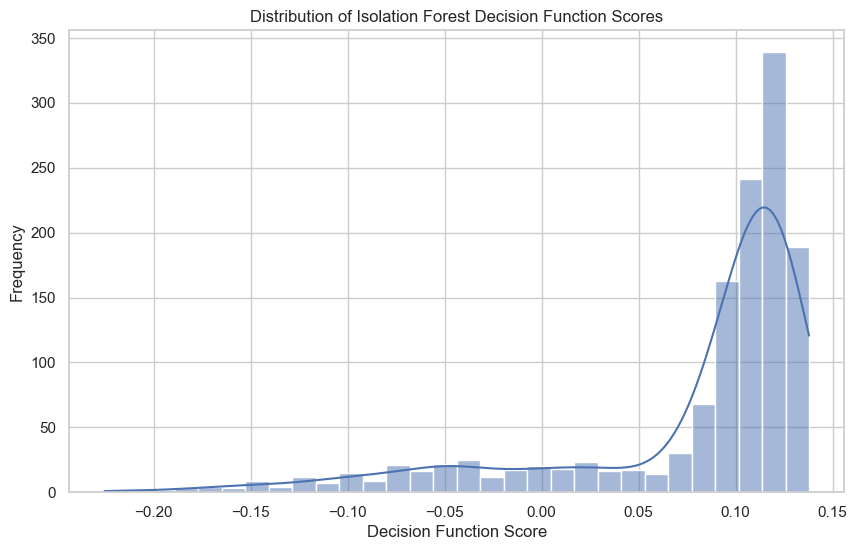

In [138]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

df_3_pivot
numerical_cols = ['approved', 'backend_reversed', 'denied', 'failed', 'processing',\
                  'reversed', 'total', 'success_rate', 'reversal_rate',\
                  'denial_rate', 'failure_rate', 'hour', 'minute'
                  ]

model = IsolationForest(random_state=42)
model.fit(df_3_pivot[numerical_cols])

preds = model.decision_function(df_3_pivot[numerical_cols])
preds

# Plotting the distribution of preds using seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(preds, kde=True, bins=30)
plt.title("Distribution of Isolation Forest Decision Function Scores")
plt.xlabel("Decision Function Score")
plt.ylabel("Frequency")
plt.show()

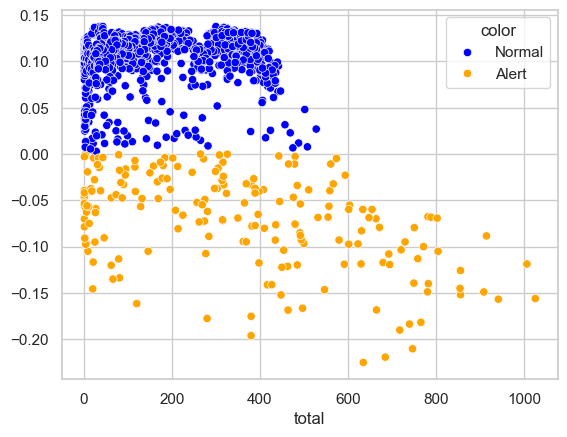

In [133]:
# Plotting transaction approval rate versus decision function scores with inverted axes using seaborn
df_3_pivot['color'] = ['Normal' if score > 0 else 'Alert' for score in preds]
sns.scatterplot(x=df_3_pivot['total'], y=preds, hue=df_3_pivot['color'], palette={'Alert': 'orange', 'Normal': 'blue'})


df_3_pivot['decision_function_score'] = preds
#df_3_pivot.to_csv('test.csv', index=False)

In [134]:
df_3_pivot['color'].value_counts()
df_3_pivot['color'].value_counts()


color
Normal    1120
Alert      202
Name: count, dtype: int64

In [136]:
24*59

1416

In [72]:
(1-1119/(1119+203))*(24*60)

221.11951588502262

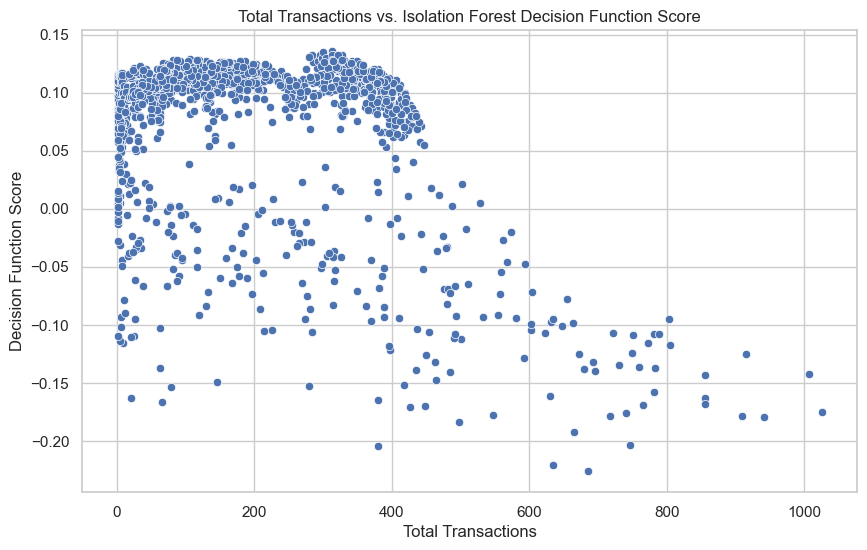

In [53]:
# Plotting transaction approval rate versus decision function scores with inverted axes using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_3_pivot['total'], y=preds)
plt.title("Total Transactions vs. Isolation Forest Decision Function Score")
plt.xlabel("Total Transactions")
plt.ylabel("Decision Function Score")

plt.show()



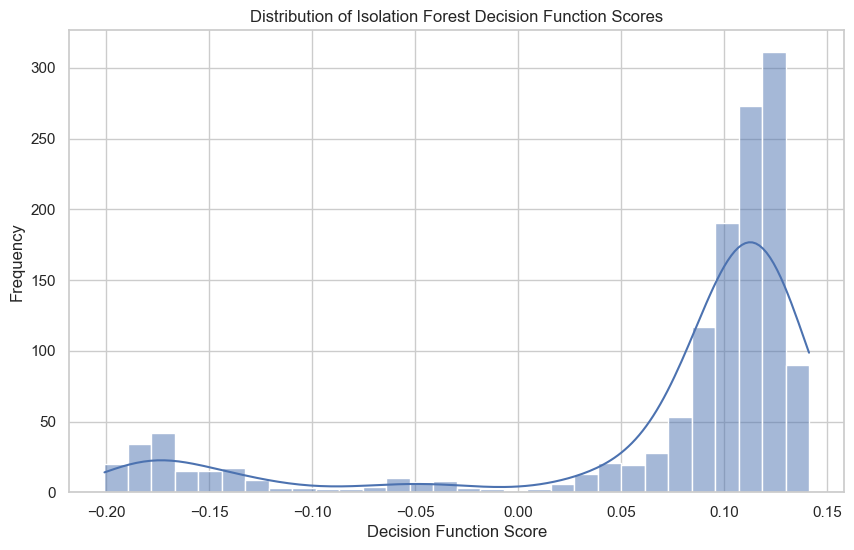

In [143]:
from sklearn.ensemble import IsolationForest

numerical_cols = ['approved', 'backend_reversed', 'denied', 'failed', 'processing',\
                  'reversed', 'total', 'success_rate', 'reversal_rate',\
                  'denial_rate', 'failure_rate', 'hour', 'minute'
                  ]

clf = IsolationForest(random_state=42)
clf.fit(df_3_pivot[numerical_cols])

preds = clf.decision_function(df_4_pivot[numerical_cols])
preds

# Plotting the distribution of preds using seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(preds, kde=True, bins=30)
plt.title("Distribution of Isolation Forest Decision Function Scores")
plt.xlabel("Decision Function Score")
plt.ylabel("Frequency")
plt.show()

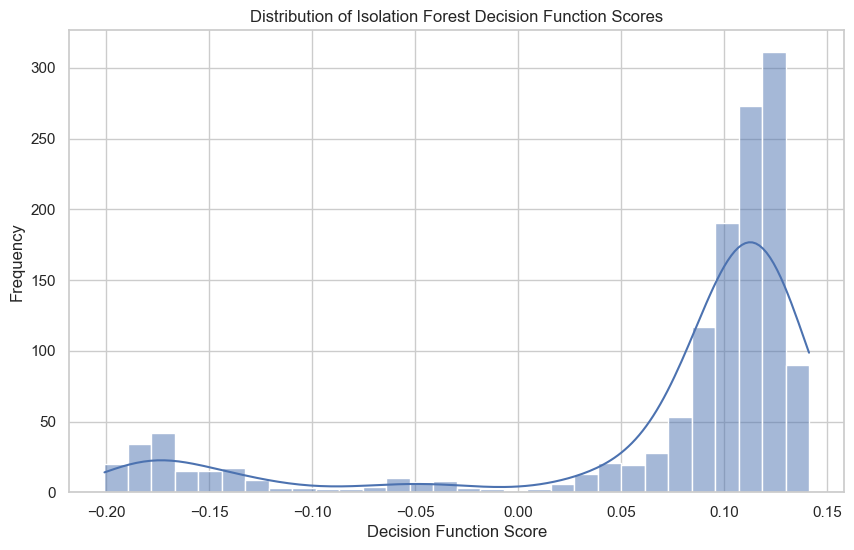

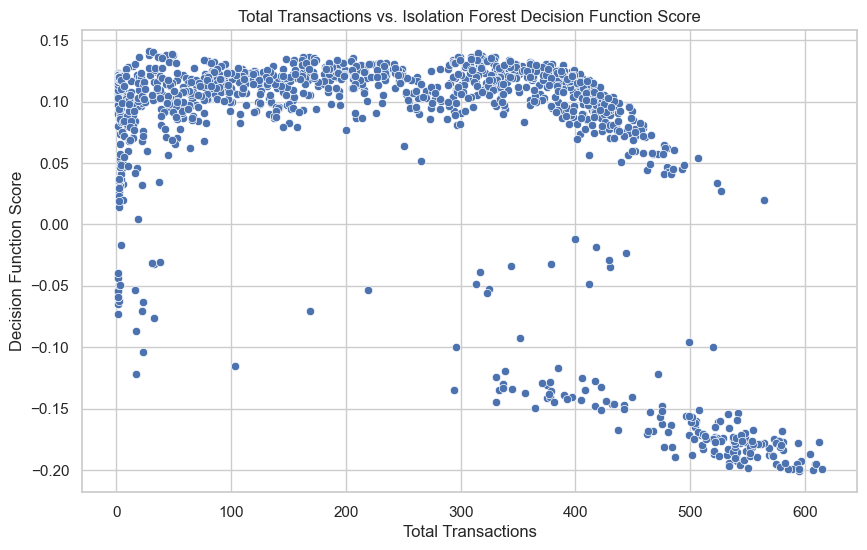

In [145]:
# Plotting transaction approval rate versus decision function scores with inverted axes using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_4_pivot['total'], y=preds)
plt.title("Total Transactions vs. Isolation Forest Decision Function Score")
plt.xlabel("Total Transactions")
plt.ylabel("Decision Function Score")

plt.show()
